In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Fertilizer Prediction.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
df = df.rename({'Soil Type': 'Soil_Type', 'Crop Type': 'Crop_Type'}, axis=1)
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
df.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


In [7]:
df['Soil_Type'].value_counts().to_dict()

{'Loamy': 21, 'Sandy': 20, 'Clayey': 20, 'Black': 19, 'Red': 19}

In [8]:
df['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [9]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [10]:
mapping = {'Urea':0,'DAP':1,'14-35-14':2,'28-28':3,'17-17-17':4,'20-20':5,'10-26-26':6} # impt concept
df['Fertilizer_Name'] = df['Fertilizer Name'].apply(lambda x:mapping[x]) #.apply() allows user to pass a funct and apply it on every single value of panda series
df


,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea,0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,1
2,34,65,62,Black,Cotton,7,9,30,14-35-14,2
3,32,62,34,Red,Tobacco,22,0,20,28-28,3
4,28,54,46,Clayey,Paddy,35,0,0,Urea,0
...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28,3
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,6
96,38,72,51,Loamy,Wheat,39,0,0,Urea,0
97,36,60,43,Sandy,Millets,15,0,41,DAP,1


In [11]:
df = df.drop('Fertilizer Name',axis=1)
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36,1
2,34,65,62,Black,Cotton,7,9,30,2
3,32,62,34,Red,Tobacco,22,0,20,3
4,28,54,46,Clayey,Paddy,35,0,0,0


## Handling Categorical Data

In [12]:
## Converting the Soil Type(categorical) Using one hot encoding
df = pd.get_dummies(df,drop_first=True) #get_dummies helps u to create dummy variables wrt no of categories present
df = df.rename({'Crop_Type_Ground Nuts': 'Crop_Type_Ground_Nuts', 'Crop_Type_Oil seeds': 'Crop_Type_Oil_seeds'}, axis=1)
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer_Name,Soil_Type_Clayey,Soil_Type_Loamy,Soil_Type_Red,...,Crop_Type_Cotton,Crop_Type_Ground_Nuts,Crop_Type_Maize,Crop_Type_Millets,Crop_Type_Oil_seeds,Crop_Type_Paddy,Crop_Type_Pulses,Crop_Type_Sugarcane,Crop_Type_Tobacco,Crop_Type_Wheat
0,26,52,38,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Fertilizer_Name', 'Soil_Type_Clayey', 'Soil_Type_Loamy',
       'Soil_Type_Red', 'Soil_Type_Sandy', 'Crop_Type_Cotton',
       'Crop_Type_Ground_Nuts', 'Crop_Type_Maize', 'Crop_Type_Millets',
       'Crop_Type_Oil_seeds', 'Crop_Type_Paddy', 'Crop_Type_Pulses',
       'Crop_Type_Sugarcane', 'Crop_Type_Tobacco', 'Crop_Type_Wheat'],
      dtype='object')

In [12]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Fertilizer_Name'))
df = df[cols+['Fertilizer_Name']] 
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Type_Clayey,Soil_Type_Loamy,Soil_Type_Red,Soil_Type_Sandy,...,Crop_Type_Ground_Nuts,Crop_Type_Maize,Crop_Type_Millets,Crop_Type_Oil_seeds,Crop_Type_Paddy,Crop_Type_Pulses,Crop_Type_Sugarcane,Crop_Type_Tobacco,Crop_Type_Wheat,Fertilizer_Name
0,26,52,38,37,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,34,65,62,7,9,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,32,62,34,22,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3
4,28,54,46,35,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Type_Clayey,Soil_Type_Loamy,Soil_Type_Red,Soil_Type_Sandy,...,Crop_Type_Ground_Nuts,Crop_Type_Maize,Crop_Type_Millets,Crop_Type_Oil_seeds,Crop_Type_Paddy,Crop_Type_Pulses,Crop_Type_Sugarcane,Crop_Type_Tobacco,Crop_Type_Wheat,Fertilizer_Name
0,26,52,38,37,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,34,65,62,7,9,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,32,62,34,22,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3
4,28,54,46,35,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Random Forest Classifier 

In [14]:
X = df.drop(columns=['Fertilizer_Name'])
y = df['Fertilizer_Name']

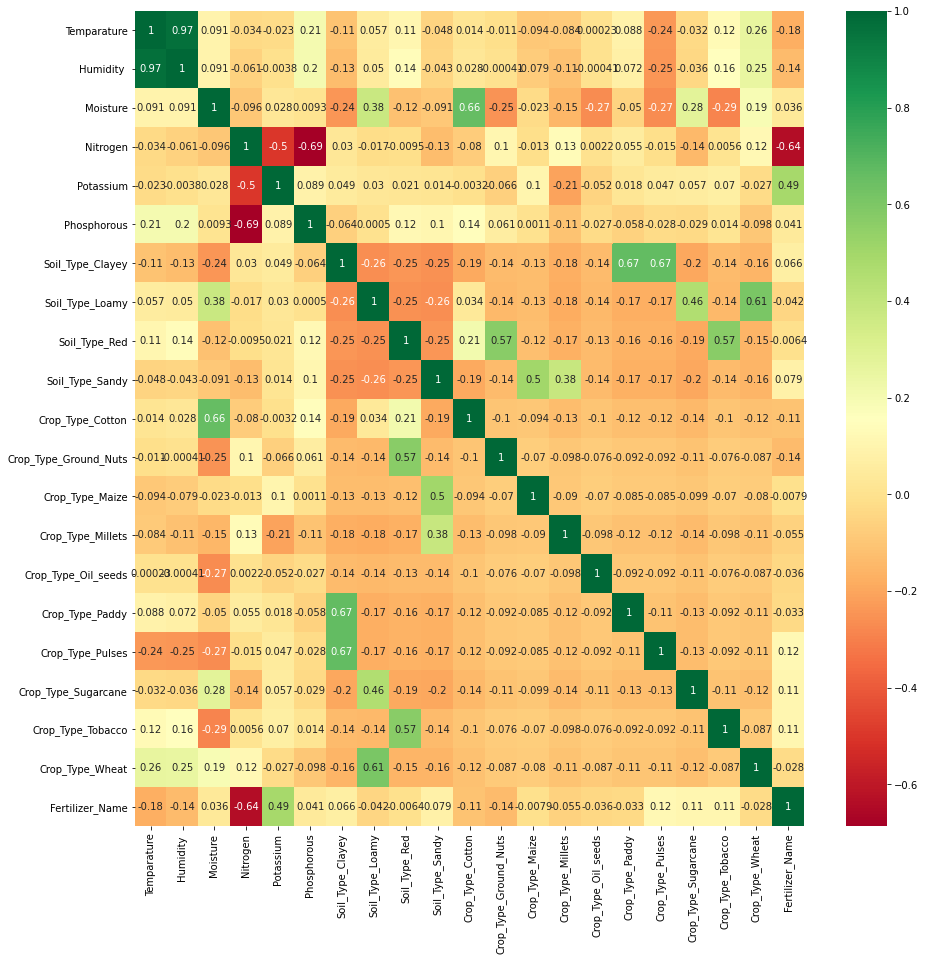

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot the heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier()

In [18]:
#Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)] #selecting diff decision trees
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
#Randomized Search CV, helps to find best parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [21]:
# Create the random grid
# taking in the form of key value pair
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid) #randomizedCv will select the best parameters from this

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
# Use the random grid to search for best hyperparams
#First create the best model to tune
rf = RandomForestClassifier()

In [23]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
#our model is now ready now we do the predictions
predictions = rf_random.predict(X_test)

In [26]:
predictions

array([2, 3, 1, 0, 2, 0, 0, 0, 3, 5, 0, 6, 5, 1, 0, 3, 1, 1, 0, 3],
      dtype=int64)

In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
score

1.0

In [28]:
from sklearn import metrics

In [29]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [30]:
import pickle

In [31]:
#Open a file for storing the data
file = open("random_forest_classification_model.pkl", 'wb')

#dump information to that file
pickle.dump(rf_random, file)